In [133]:
# NIRMALYA_THAKURTA_2052_DM_LAB_12
# Categorical Encoading Assignment 6-Mean-Encoding

In [246]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
from feature_engine.encoding import MeanEncoder

In [247]:
data = pd.read_csv(
    'titanic.csv',
    usecols=['cabin', 'sex', 'embarked', 'survived'])

data.head()

,survived,sex,cabin,embarked
0,1,female,B5,S
1,1,male,C22,S
2,0,female,C22,S
3,0,male,C22,S
4,0,female,C22,S


In [248]:
data.embarked.fillna('Missing', inplace= True)
data.cabin.fillna('n', inplace= True)

In [249]:
data['cabin'] = data['cabin'].str[0]

data.head()

,survived,sex,cabin,embarked
0,1,female,B,S
1,1,male,C,S
2,0,female,C,S
3,0,male,C,S
4,0,female,C,S


In [250]:
# let's have a look at how many labels each variable has
for x in data.columns:
    print(x ,':', len(data[x].unique()),' labels')

survived : 2  labels
sex : 2  labels
cabin : 9  labels
embarked : 4  labels


In [251]:
# let's explore the unique categories for cabin, sex and embarked
data.cabin.unique()

array(['B', 'C', 'E', 'D', 'A', 'n', 'T', 'F', 'G'], dtype=object)

In [252]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [253]:
data.embarked.unique()

array(['S', 'C', 'Missing', 'Q'], dtype=object)

In [254]:
 #let's separate into training and testing set
X_train,X_test=train_test_split(data,test_size=0.3)

X_train.shape, X_test.shape

((916, 4), (393, 4))

<AxesSubplot:xlabel='embarked', ylabel='Mean Survival'>

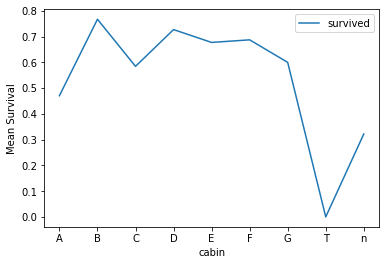

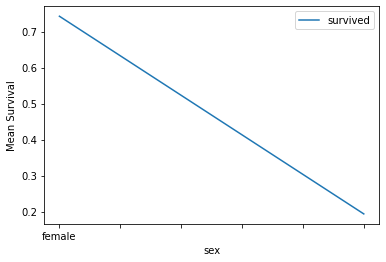

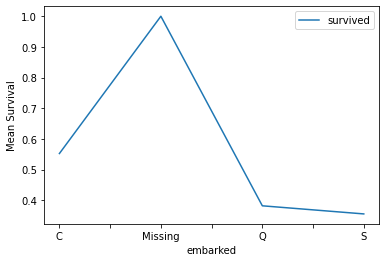

In [255]:
# let's explore the relationship of the categories with the target
X_train[['cabin','survived']].groupby('cabin').mean().plot.line(ylabel='Mean Survival')
X_train[['sex','survived']].groupby('sex').mean().plot.line(ylabel='Mean Survival')
X_train[['embarked','survived']].groupby('embarked').mean().plot.line(ylabel='Mean Survival')

In [256]:
# let's calculate the mean target value per category for cabin
print(X_train.groupby('cabin').mean())

       survived
cabin          
A      0.470588
B      0.767442
C      0.584615
D      0.727273
E      0.677419
F      0.687500
G      0.600000
T      0.000000
n      0.321986


In [257]:
# and now let's do the same but capturing the result in a dictionary
cabindict=dict(zip(list(X_train.groupby('cabin').mean().index),list(X_train.groupby('cabin').mean()['survived'])))

cabindict

{'A': 0.47058823529411764,
 'B': 0.7674418604651163,
 'C': 0.5846153846153846,
 'D': 0.7272727272727273,
 'E': 0.6774193548387096,
 'F': 0.6875,
 'G': 0.6,
 'T': 0.0,
 'n': 0.3219858156028369}

In [258]:
# now, we replace the labels with the target means
X_train['cabin']=X_train['cabin'].replace(to_replace=list(cabindict.keys()),value=list(cabindict.values()))

<ipython-input-258-39b49662598b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cabin']=X_train['cabin'].replace(to_replace=list(cabindict.keys()),value=list(cabindict.values()))


In [259]:
# let's explore the result
X_train['cabin'].head(10)

190     0.727273
208     0.584615
851     0.321986
502     0.321986
740     0.321986
679     0.321986
199     0.584615
0       0.767442
716     0.321986
1205    0.321986
Name: cabin, dtype: float64

In [260]:
# and now we run a loop over the remaining categorical variables
cabindict=dict(zip(list(X_train.groupby('sex').mean().index),list(X_train.groupby('sex').mean()['survived'])))
X_train['sex']=X_train['sex'].replace(to_replace=list(cabindict.keys()),value=list(cabindict.values()))

cabindict=dict(zip(list(X_train.groupby('embarked').mean().index),list(X_train.groupby('embarked').mean()['survived'])))
X_train['embarked']=X_train['embarked'].replace(to_replace=list(cabindict.keys()),value=list(cabindict.values()))

<ipython-input-260-44951aba5d64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['sex']=X_train['sex'].replace(to_replace=list(cabindict.keys()),value=list(cabindict.values()))
<ipython-input-260-44951aba5d64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['embarked']=X_train['embarked'].replace(to_replace=list(cabindict.keys()),value=list(cabindict.values()))


In [261]:
X_train.head()

,survived,sex,cabin,embarked
190,1,0.74269,0.727273,0.355590
208,1,0.74269,0.584615,0.382022
851,1,0.74269,0.321986,0.355590
502,1,0.74269,0.321986,0.355590
740,0,0.19338,0.321986,0.355590


<AxesSubplot:xlabel='embarked', ylabel='Mean Survival'>

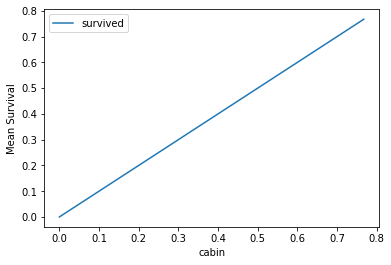

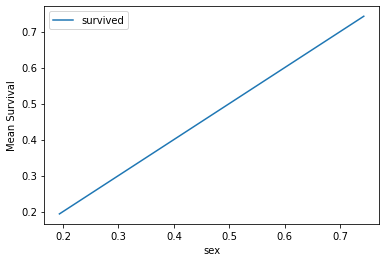

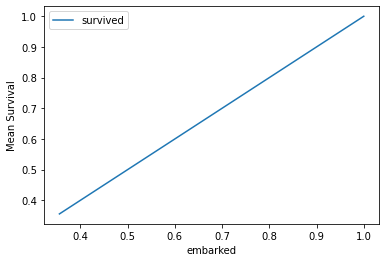

In [262]:
# let's inspect the newly created monotonic relationship
# between the variables and the target
X_train[['cabin','survived']].groupby('cabin').mean().plot.line(ylabel='Mean Survival')
X_train[['sex','survived']].groupby('sex').mean().plot.line(ylabel='Mean Survival')
X_train[['embarked','survived']].groupby('embarked').mean().plot.line(ylabel='Mean Survival')


# MEAN ENCODING

In [263]:
X_train,X_test,Y_train,Y_test=train_test_split(data[['sex','cabin','embarked']],data['survived'],test_size=0.3)

X_train.shape, X_test.shape

((916, 3), (393, 3))

In [264]:
mean_enc=MeanEncoder().fit(X_train,Y_train)
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

# let's explore the result
X_train.head()

,sex,cabin,embarked
137,0.724458,0.702128,0.326625
379,0.724458,0.290185,0.326625
718,0.178752,0.290185,0.326625
299,0.178752,0.290185,0.540541
859,0.724458,0.290185,0.325301
